In [5]:
import sympy as sp
from sympy import Symbol, diff

In [3]:
E = Symbol('E', positive = True)
R3 = Symbol('R_3', positive = True)
R4 = Symbol('R_4', positive = True)
beta = Symbol('beta', positive = True)
VB = Symbol('V_B', positive = True)


In [8]:
VC = (E + (R3/R4)*VB*(1+beta))/(1+(R3/R4)*(1+beta))
dVC = sp.simplify(sp.simplify(diff(VC, beta)))
dVC

R_3*R_4*(-E + V_B)/(R_3*beta + R_3 + R_4)**2

c:\Users\cahya\anaconda3\envs\jyu_learn\lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\cahya\AppData\Local\Temp\ipykernel_4988\1699897499.py:33: RuntimeWarning: overflow encountered in exp
  F[0] = (Vinput - VB)/Rin - Is*(1/Bf*(np.exp((VB-VE)/Vt)-1) + 1/Br*(np.exp((VB-VC)/Vt)-1))
C:\Users\cahya\AppData\Local\Temp\ipykernel_4988\1699897499.py:34: RuntimeWarning: overflow encountered in exp
  F[1] = (Vcc-VC)/Rc - Is*(np.exp((VB-VE)/Vt) - np.exp((VB-VC)/Vt) - 1/Br*(np.exp((VB-VC)/Vt)-1))


From the graph, we can see that the approximate and the accurate model 
will give the same value in the vicinity of Vin = 1 V.
This correspond to VC = Vout around 5 V.


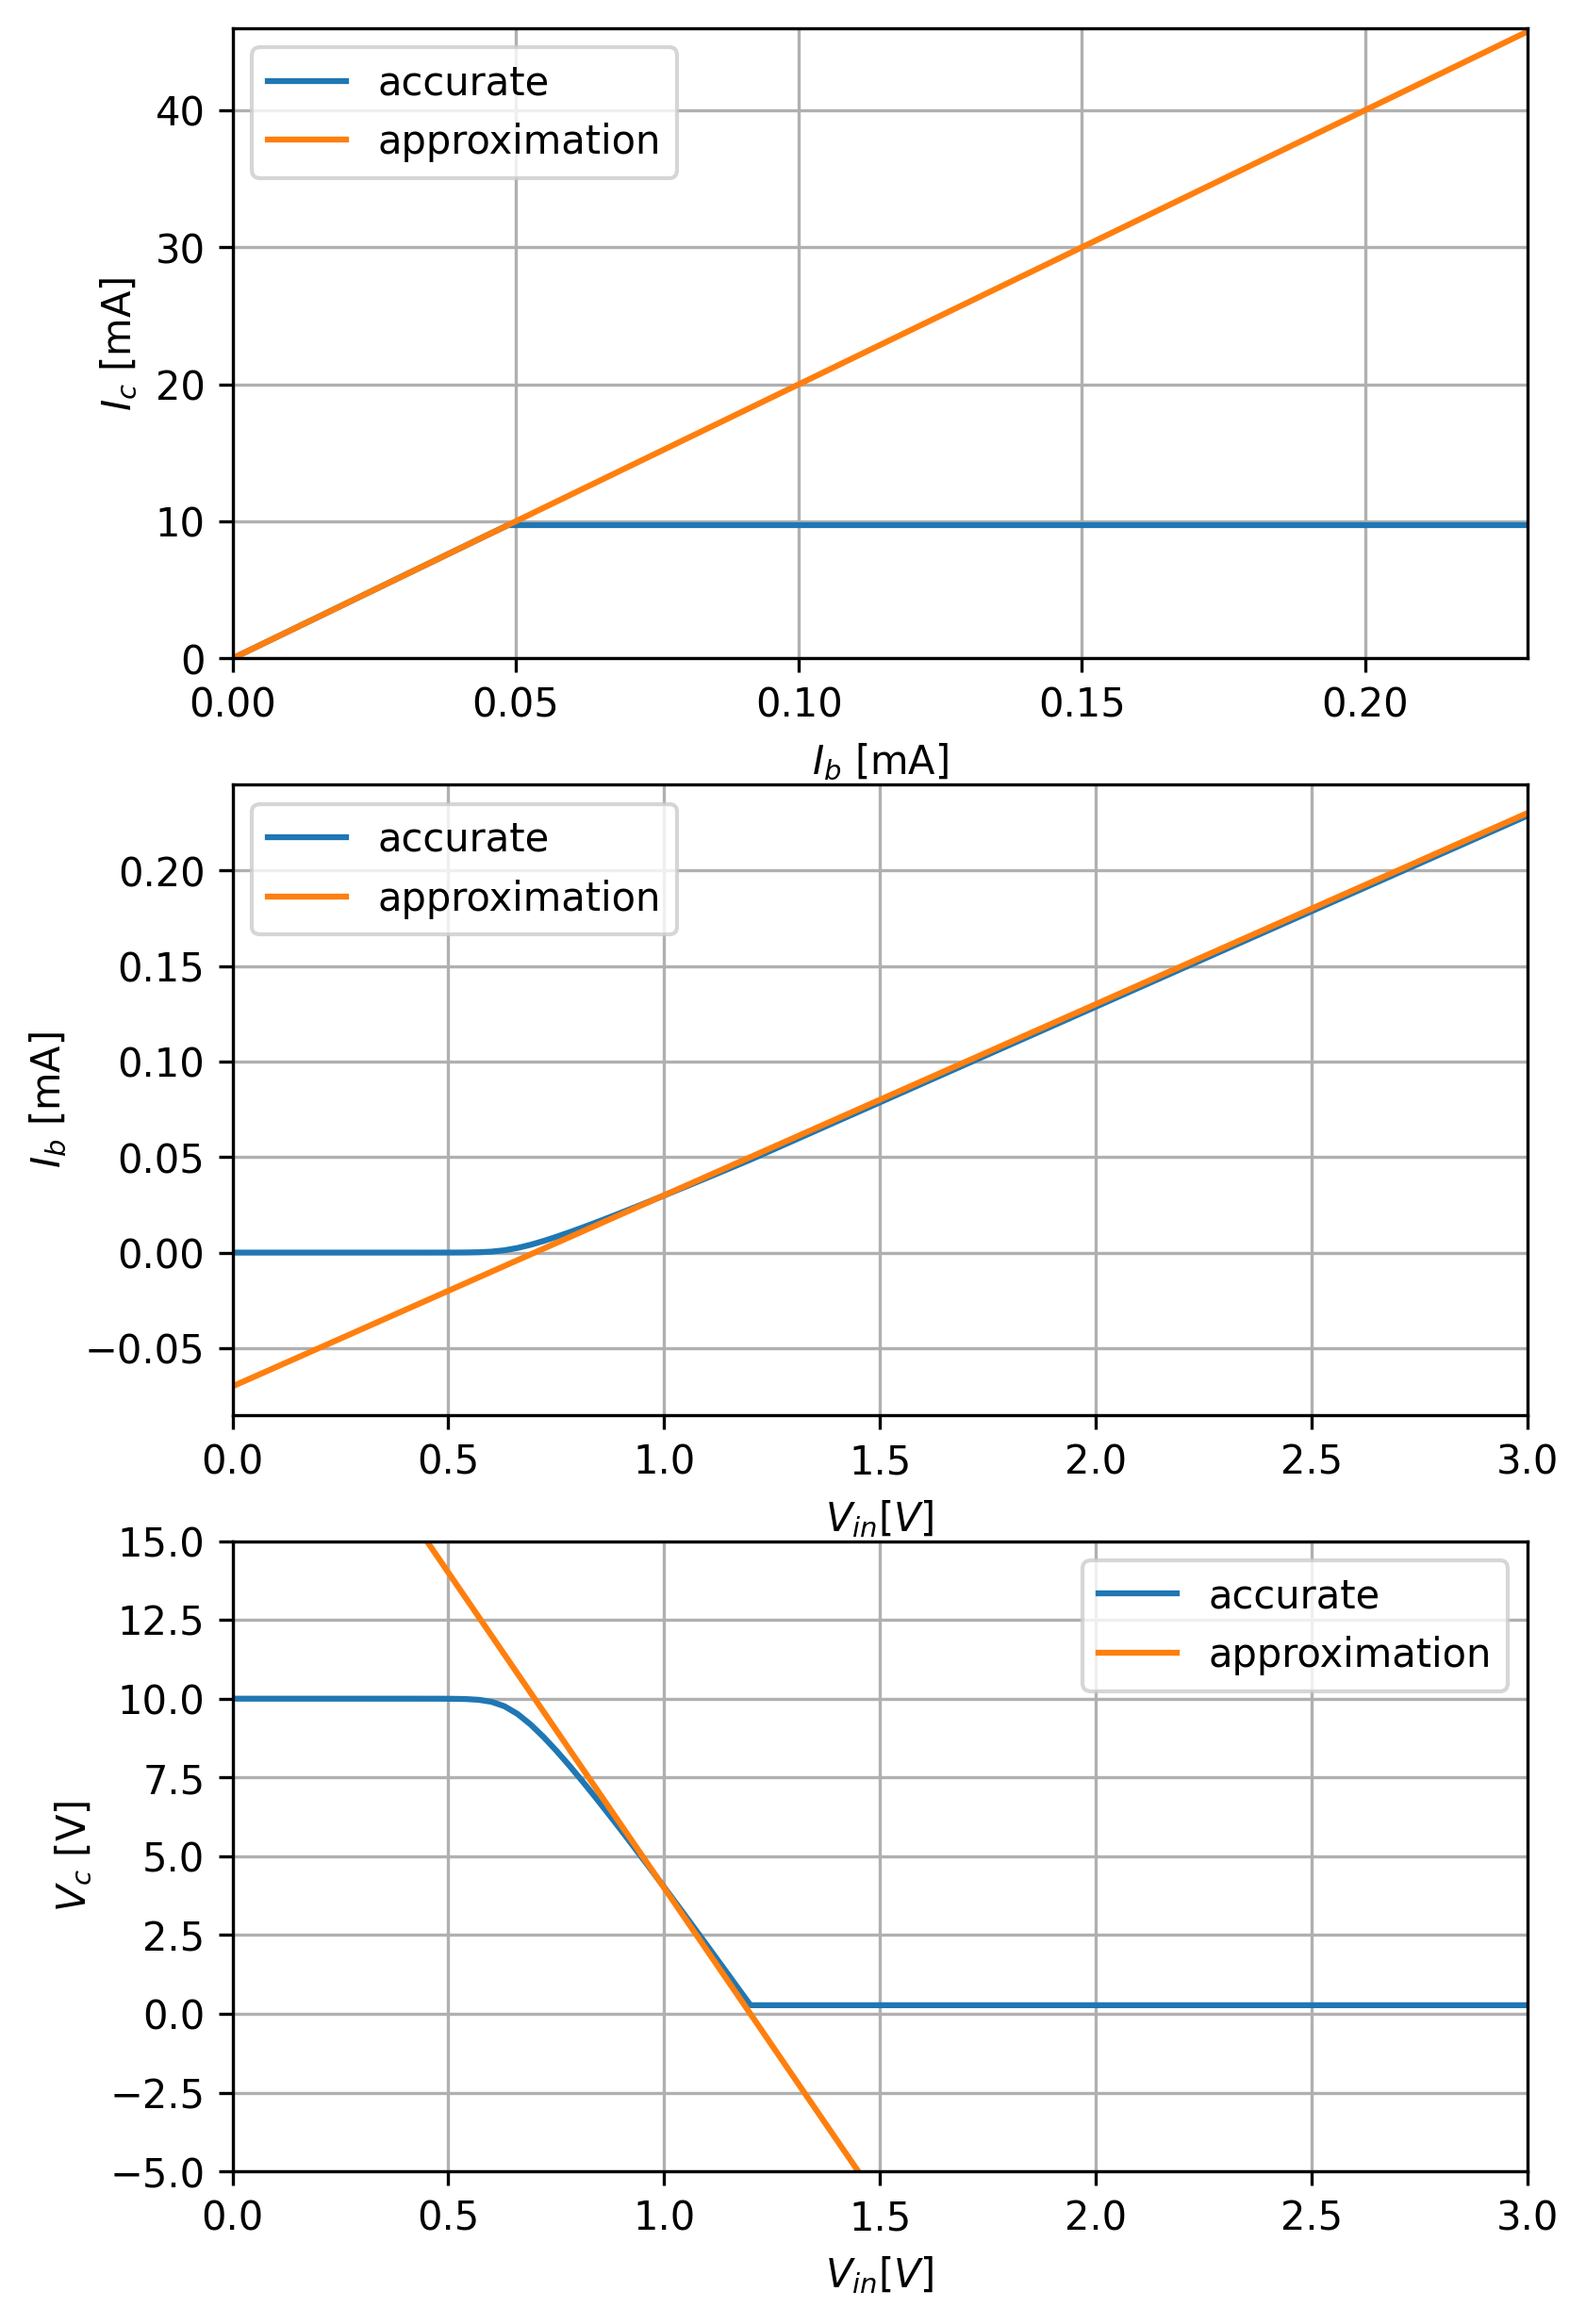

In [33]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

T = 300
k = 1.38064852e-23
q = 1.60217662e-19
Vt = k*T/q

Rin = 10e3
Rc = 1e3

Is = 1e-14
Bf = 200
Br = 10

i = 0
Vin = np.linspace(1e-4, 3, 101)
Vcc = 10

V = np.array([0,0]) # initial guess
VC_approx = 0 # Initial guess

V1, V2, V3, Ib, Ic, Ib_appro, Ic_appro = np.vstack([np.zeros(len(Vin))]*7) #initializing variables


def func(V):
      F = np.empty(2)
      VB = V[0]
      VC = V[1]
      VE = 0

      F[0] = (Vinput - VB)/Rin - Is*(1/Bf*(np.exp((VB-VE)/Vt)-1) + 1/Br*(np.exp((VB-VC)/Vt)-1))
      F[1] = (Vcc-VC)/Rc - Is*(np.exp((VB-VE)/Vt) - np.exp((VB-VC)/Vt) - 1/Br*(np.exp((VB-VC)/Vt)-1))
      return F

def approx(V):

      F = (Vinput - 0.7)/Rin - (1/Bf)*(10-V)/Rc
      return F

for vin in Vin:

    Vinput = vin

    V = fsolve(func, V)
    VC_approx = fsolve(approx, VC_approx)

    V1[i] = V[0]
    V2[i] = V[1]
    V3[i] = VC_approx


    Ib[i] = (vin - V1[i])/Rin
    Ic[i] = (Vcc - V2[i])/Rc
    Ib_appro[i] = (vin - 0.7)/Rin
    Ic_appro[i] = (Vcc - V3[i])/Rc


    i += 1

f, ax = plt.subplots(3, figsize=(15/2.54, 25/2.54), dpi=300)
ax[0].plot(Ib*1000, Ic*1000, label = 'accurate')
ax[0].plot(Ib_appro*1000, Ic_appro*1000, label = 'approximation')
ax[0].set_xlabel('$I_b$ [mA]')
ax[0].set_ylabel('$I_c$ [mA]')
ax[0].set_xlim([0, Ib[-1]*1000])
ax[0].set_ylim([0, Ic_appro[-1]*1000])
ax[0].tick_params(axis='both', labelsize=10)
ax[0].legend()
ax[0].grid()


ax[1].plot(Vin, Ib*1000, label = 'accurate')
ax[1].plot(Vin, Ib_appro*1000, label = 'approximation')
ax[1].set_xlabel('$V_{in} [V]$')
ax[1].set_ylabel('$I_b$ [mA]')
ax[1].set_xlim([0,Vin[-1]])
ax[1].tick_params(axis='both', labelsize=10)
ax[1].legend()
ax[1].grid()

ax[2].plot(Vin, V2, label = 'accurate')
ax[2].plot(Vin, V3, label = 'approximation')
ax[2].set_xlabel('$V_{in} [V]$')
ax[2].set_ylabel('$V_c$ [V]')
ax[2].set_xlim([0,Vin[-1]])
ax[2].set_ylim([-5,15])
ax[2].tick_params(axis='both', labelsize=10)
ax[2].legend()
ax[2].grid()


print("From the graph, we can see that the approximate and the accurate model \nwill give the same value in the vicinity of Vin = 1 V.\nThis correspond to VC = Vout around 5 V.")



plt.show()




